<a href="https://colab.research.google.com/github/ash12hub/DS-Unit-1-Sprint-5-Data-Storytelling-Blog-Post/blob/files/Lambda%20Project%20Week.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [0]:
import pandas as pd;
from google.colab import drive;
import numpy as np;

In [0]:
months = ['Jan','Feb', 'Mar', 'Apr', 'May', 'Jun', 'jul', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec'];

#Load Datasets

In [26]:
from google.colab import files;
files.upload();

##Stations

In [27]:
stations = pd.read_csv("https://raw.githubusercontent.com/ash12hub/DS-Unit-1-Sprint-5-Data-Storytelling-Blog-Post/files/station.csv");
stations.head()

,id,name,lat,long,dock_count,city,installation_date
0,2,San Jose Diridon Caltrain Station,37.329732,-121.901782,27,San Jose,8/6/2013
1,3,San Jose Civic Center,37.330698,-121.888979,15,San Jose,8/5/2013
2,4,Santa Clara at Almaden,37.333988,-121.894902,11,San Jose,8/6/2013
3,5,Adobe on Almaden,37.331415,-121.893200,19,San Jose,8/5/2013
4,6,San Pedro Square,37.336721,-121.894074,15,San Jose,8/7/2013


In [28]:
stations['city'].value_counts()

San Francisco    35
San Jose         16
Redwood City      7
Mountain View     7
Palo Alto         5
Name: city, dtype: int64

##Trips

In [29]:
trips = pd.read_csv('trip.csv');
trips.head()

,id,duration,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_id,subscription_type,zip_code
0,4576,63,8/29/2013 14:13,South Van Ness at Market,66,8/29/2013 14:14,South Van Ness at Market,66,520,Subscriber,94127
1,4607,70,8/29/2013 14:42,San Jose City Hall,10,8/29/2013 14:43,San Jose City Hall,10,661,Subscriber,95138
2,4130,71,8/29/2013 10:16,Mountain View City Hall,27,8/29/2013 10:17,Mountain View City Hall,27,48,Subscriber,97214
3,4251,77,8/29/2013 11:29,San Jose City Hall,10,8/29/2013 11:30,San Jose City Hall,10,26,Subscriber,95060
4,4299,83,8/29/2013 12:02,South Van Ness at Market,66,8/29/2013 12:04,Market at 10th,67,319,Subscriber,94103


In [30]:
pd.merge

<function pandas.core.reshape.merge.merge>

##Weather

In [31]:
weather = pd.read_csv("https://raw.githubusercontent.com/ash12hub/DS-Unit-1-Sprint-5-Data-Storytelling-Blog-Post/files/weather.csv");
weather.head()

,date,max_temperature_f,mean_temperature_f,min_temperature_f,max_dew_point_f,mean_dew_point_f,min_dew_point_f,max_humidity,mean_humidity,min_humidity,max_sea_level_pressure_inches,mean_sea_level_pressure_inches,min_sea_level_pressure_inches,max_visibility_miles,mean_visibility_miles,min_visibility_miles,max_wind_Speed_mph,mean_wind_speed_mph,max_gust_speed_mph,precipitation_inches,cloud_cover,events,wind_dir_degrees,zip_code
0,8/29/2013,74.0,68.0,61.0,61.0,58.0,56.0,93.0,75.0,57.0,30.07,30.02,29.97,10.0,10.0,10.0,23.0,11.0,28.0,0,4.0,NaN,286.0,94107
1,8/30/2013,78.0,69.0,60.0,61.0,58.0,56.0,90.0,70.0,50.0,30.05,30.00,29.93,10.0,10.0,7.0,29.0,13.0,35.0,0,2.0,NaN,291.0,94107
2,8/31/2013,71.0,64.0,57.0,57.0,56.0,54.0,93.0,75.0,57.0,30.00,29.96,29.92,10.0,10.0,10.0,26.0,15.0,31.0,0,4.0,NaN,284.0,94107
3,9/1/2013,74.0,66.0,58.0,60.0,56.0,53.0,87.0,68.0,49.0,29.96,29.93,29.91,10.0,10.0,10.0,25.0,13.0,29.0,0,4.0,NaN,284.0,94107
4,9/2/2013,75.0,69.0,62.0,61.0,60.0,58.0,93.0,77.0,61.0,29.97,29.94,29.90,10.0,10.0,6.0,23.0,12.0,30.0,0,6.0,NaN,277.0,94107


#Formatting Trips

Let's organize the data in trips to make it easier to work with.

First we'll handle missing values.

In [32]:
print(trips.shape)
trips = trips.dropna()
trips = trips.reset_index();
del trips['index'];
trips.head()

(669959, 11)


,id,duration,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_id,subscription_type,zip_code
0,4576,63,8/29/2013 14:13,South Van Ness at Market,66,8/29/2013 14:14,South Van Ness at Market,66,520,Subscriber,94127
1,4607,70,8/29/2013 14:42,San Jose City Hall,10,8/29/2013 14:43,San Jose City Hall,10,661,Subscriber,95138
2,4130,71,8/29/2013 10:16,Mountain View City Hall,27,8/29/2013 10:17,Mountain View City Hall,27,48,Subscriber,97214
3,4251,77,8/29/2013 11:29,San Jose City Hall,10,8/29/2013 11:30,San Jose City Hall,10,26,Subscriber,95060
4,4299,83,8/29/2013 12:02,South Van Ness at Market,66,8/29/2013 12:04,Market at 10th,67,319,Subscriber,94103


Let's split the date and time so that each ones are easier to access.

In [0]:
start_time = [];
end_time = [];
get_days = [];
get_months = [];
get_years = [];
for i in range(len(trips)):
  split_date_time = trips['start_date'][i].split(' ');
  split_date = split_date_time[0].split('/');
  get_days.append(int(split_date[1]));
  get_months.append(int(split_date[0]));
  get_years.append(int(split_date[2]));
  start_time.append(split_date_time[1]);
  
  end_time.append(trips['end_date'][i].split(' ')[1]);
trips['start_time'] = start_time;
trips['end_time'] = end_time;

trips['start_date'] = trips['start_date'].apply(lambda x: x.split(' ')[0]);
trips['end_date'] = trips['end_date'].apply(lambda x: x.split(' ')[0]);
trips['day'] = get_days;
trips['month'] = get_months;
trips['year'] = get_years;

In [34]:
trips.head()

,id,duration,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_id,subscription_type,zip_code,start_time,end_time,day,month,year
0,4576,63,8/29/2013,South Van Ness at Market,66,8/29/2013,South Van Ness at Market,66,520,Subscriber,94127,14:13,14:14,29,8,2013
1,4607,70,8/29/2013,San Jose City Hall,10,8/29/2013,San Jose City Hall,10,661,Subscriber,95138,14:42,14:43,29,8,2013
2,4130,71,8/29/2013,Mountain View City Hall,27,8/29/2013,Mountain View City Hall,27,48,Subscriber,97214,10:16,10:17,29,8,2013
3,4251,77,8/29/2013,San Jose City Hall,10,8/29/2013,San Jose City Hall,10,26,Subscriber,95060,11:29,11:30,29,8,2013
4,4299,83,8/29/2013,South Van Ness at Market,66,8/29/2013,Market at 10th,67,319,Subscriber,94103,12:02,12:04,29,8,2013


#Analyze trips

First let's find out the number of trips that take place in California throught 2013 to 2015.

In [35]:
trips.year.value_counts()

2014    324846
2015    242885
2013     95609
Name: year, dtype: int64

In [36]:
trips['year'].value_counts()
pd.crosstab(trips['year'], trips['month'])

month,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
2013,0,0,0,0,0,0,0,1916,23377,27822,23309,19185
2014,23789,18487,24586,26199,28461,29945,31227,31163,31653,34195,25485,19656
2015,27829,26386,31588,31344,29515,31886,32457,31880,0,0,0,0


## Trips in 2015
We'll check the trips that take place in 2015 and work with that.

In [37]:
trips2015 = trips[trips['year'] == 2015];
trips2015 = trips2015.sort_values('start_date');
trips2015.head()

,id,duration,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_id,subscription_type,zip_code,start_time,end_time,day,month,year
552350,588916,280,1/1/2015,Commercial at Montgomery,45,1/1/2015,Market at Sansome,77,401,Subscriber,94112,0:25,0:30,1,1,2015
552234,589069,295,1/1/2015,Temporary Transbay Terminal (Howard at Beale),55,1/1/2015,Yerba Buena Center of the Arts (3rd @ Howard),68,274,Subscriber,94111,15:28,15:33,1,1,2015
552233,589070,550,1/1/2015,Washington at Kearny,46,1/1/2015,Spear at Folsom,49,282,Subscriber,94105,15:28,15:37,1,1,2015
552232,589071,1002,1/1/2015,Embarcadero at Sansome,60,1/1/2015,2nd at Townsend,61,279,Customer,94158,15:30,15:47,1,1,2015
552231,589072,9364,1/1/2015,Market at 4th,76,1/1/2015,Golden Gate at Polk,59,313,Customer,4037000,15:40,18:17,1,1,2015


In [38]:
station_cities = stations[['city', 'name']]
station_cities.columns = ['city', 'start_station_name']
station_cities.head()

,city,start_station_name
0,San Jose,San Jose Diridon Caltrain Station
1,San Jose,San Jose Civic Center
2,San Jose,Santa Clara at Almaden
3,San Jose,Adobe on Almaden
4,San Jose,San Pedro Square


In [39]:
trips2015 = pd.merge(trips2015, station_cities, on='start_station_name');
trips2015.head()

,id,duration,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_id,subscription_type,zip_code,start_time,end_time,day,month,year,city
0,588916,280,1/1/2015,Commercial at Montgomery,45,1/1/2015,Market at Sansome,77,401,Subscriber,94112,0:25,0:30,1,1,2015,San Francisco
1,589076,6252,1/1/2015,Commercial at Montgomery,45,1/1/2015,Grant Avenue at Columbus Avenue,73,383,Customer,10037,15:46,17:30,1,1,2015,San Francisco
2,589077,696,1/1/2015,Commercial at Montgomery,45,1/1/2015,Grant Avenue at Columbus Avenue,73,878,Customer,nil,15:47,15:59,1,1,2015,San Francisco
3,589134,281,1/1/2015,Commercial at Montgomery,45,1/1/2015,Embarcadero at Sansome,60,577,Subscriber,94111,20:53,20:58,1,1,2015,San Francisco
4,598976,351,1/10/2015,Commercial at Montgomery,45,1/10/2015,Grant Avenue at Columbus Avenue,73,534,Subscriber,94107,17:46,17:52,10,1,2015,San Francisco


In [0]:
import numpy as np;

In [43]:
trips2015[trips2015['city'] == 'San Jose'].shape

(12059, 17)

In [44]:
count2015 = trips2015.month.value_counts();
count2015 = count2015.sort_index().reset_index();
count2015['index'] = count2015['index'].apply(lambda x: months[x-1]);
count2015.columns = ["Month", "Trips"];
count2015

,Month,Trips
0,Jan,27277
1,Feb,25848
2,Mar,30967
3,Apr,30741
4,May,28913
5,Jun,31249
6,jul,31716
7,Aug,31203


In [45]:
print('mean:', count2015['Trips'].mean(), '\ntotal:', count2015['Trips'].sum())

mean: 29739.25 
total: 237914


In [0]:
import matplotlib.pyplot as plt;

Her's a plot for the trips in 2015

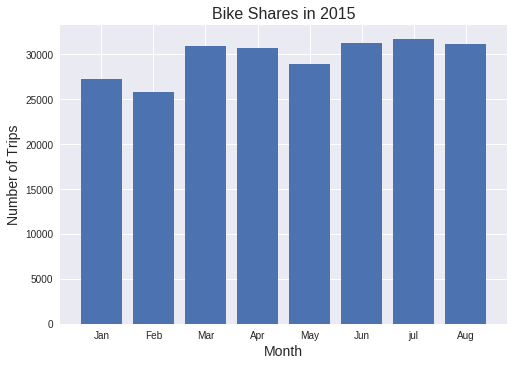

In [47]:
plt.style.use('seaborn')
plt.bar(count2015['Month'], count2015['Trips'])
plt.title("Bike Shares in 2015", fontdict={'fontsize': 16});
plt.xlabel("Month", fontdict={'fontsize': 14});
plt.ylabel("Number of Trips", fontdict={'fontsize': 14});
plt.show();

In [48]:
weather.head()

,date,max_temperature_f,mean_temperature_f,min_temperature_f,max_dew_point_f,mean_dew_point_f,min_dew_point_f,max_humidity,mean_humidity,min_humidity,max_sea_level_pressure_inches,mean_sea_level_pressure_inches,min_sea_level_pressure_inches,max_visibility_miles,mean_visibility_miles,min_visibility_miles,max_wind_Speed_mph,mean_wind_speed_mph,max_gust_speed_mph,precipitation_inches,cloud_cover,events,wind_dir_degrees,zip_code
0,8/29/2013,74.0,68.0,61.0,61.0,58.0,56.0,93.0,75.0,57.0,30.07,30.02,29.97,10.0,10.0,10.0,23.0,11.0,28.0,0,4.0,NaN,286.0,94107
1,8/30/2013,78.0,69.0,60.0,61.0,58.0,56.0,90.0,70.0,50.0,30.05,30.00,29.93,10.0,10.0,7.0,29.0,13.0,35.0,0,2.0,NaN,291.0,94107
2,8/31/2013,71.0,64.0,57.0,57.0,56.0,54.0,93.0,75.0,57.0,30.00,29.96,29.92,10.0,10.0,10.0,26.0,15.0,31.0,0,4.0,NaN,284.0,94107
3,9/1/2013,74.0,66.0,58.0,60.0,56.0,53.0,87.0,68.0,49.0,29.96,29.93,29.91,10.0,10.0,10.0,25.0,13.0,29.0,0,4.0,NaN,284.0,94107
4,9/2/2013,75.0,69.0,62.0,61.0,60.0,58.0,93.0,77.0,61.0,29.97,29.94,29.90,10.0,10.0,6.0,23.0,12.0,30.0,0,6.0,NaN,277.0,94107


In [0]:
weather_days = [];
weather_months = []
weather_years = [];
for date in weather['date']:
  splitDate = date.split('/');
  weather_days.append(int(splitDate[1]));
  weather_months.append(int(splitDate[0]));
  weather_years.append(int(splitDate[2]));

weather['day'] = weather_days;
weather['month'] = weather_months;
weather['year'] = weather_years;

In [51]:
(weather['events'].dropna().shape[0]/weather['events'].shape[0])*100

14.242837653478855

In [52]:
weather2015 = weather[weather['year'] == 2015]
weather2015.head()

,date,max_temperature_f,mean_temperature_f,min_temperature_f,max_dew_point_f,mean_dew_point_f,min_dew_point_f,max_humidity,mean_humidity,min_humidity,max_sea_level_pressure_inches,mean_sea_level_pressure_inches,min_sea_level_pressure_inches,max_visibility_miles,mean_visibility_miles,min_visibility_miles,max_wind_Speed_mph,mean_wind_speed_mph,max_gust_speed_mph,precipitation_inches,cloud_cover,events,wind_dir_degrees,zip_code,day,month,year
1962,1/1/2015,56.0,47.0,38.0,27.0,20.0,14.0,54.0,37.0,20.0,30.18,30.13,30.07,10.0,10.0,10.0,23.0,8.0,28.0,0,1.0,NaN,40.0,94107,1,1,2015
1963,1/2/2015,50.0,41.0,32.0,36.0,30.0,25.0,76.0,64.0,52.0,30.23,30.18,30.13,10.0,10.0,9.0,8.0,4.0,10.0,0,1.0,NaN,63.0,94107,2,1,2015
1964,1/3/2015,53.0,43.0,32.0,38.0,34.0,28.0,82.0,66.0,50.0,30.33,30.26,30.20,10.0,10.0,8.0,12.0,2.0,14.0,0,1.0,NaN,305.0,94107,3,1,2015
1965,1/4/2015,54.0,45.0,35.0,42.0,37.0,33.0,85.0,72.0,59.0,30.44,30.38,30.32,10.0,8.0,6.0,14.0,3.0,17.0,0,5.0,NaN,154.0,94107,4,1,2015
1966,1/5/2015,56.0,46.0,36.0,43.0,38.0,32.0,85.0,68.0,50.0,30.39,30.32,30.23,10.0,9.0,6.0,8.0,3.0,9.0,0,4.0,NaN,170.0,94107,5,1,2015


In [53]:
areas = weather2015['zip_code'].value_counts().reset_index()['index'];
areas

0    94107
1    94063
2    94041
3    95113
4    94301
Name: index, dtype: int64

In [54]:
areaTrips = [];
for area in areas:
  trip = trips2015[trips2015['zip_code'] == str(area)];
  areaTrips.append(trip);
areaTrips[0].head()

,id,duration,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_id,subscription_type,zip_code,start_time,end_time,day,month,year,city
4,598976,351,1/10/2015,Commercial at Montgomery,45,1/10/2015,Grant Avenue at Columbus Avenue,73,534,Subscriber,94107,17:46,17:52,10,1,2015,San Francisco
9,601001,216,1/12/2015,Commercial at Montgomery,45,1/12/2015,Broadway St at Battery St,82,361,Subscriber,94107,18:26,18:29,12,1,2015,San Francisco
12,601172,309,1/12/2015,Commercial at Montgomery,45,1/12/2015,Grant Avenue at Columbus Avenue,73,493,Subscriber,94107,21:12,21:17,12,1,2015,San Francisco
20,600465,238,1/12/2015,Commercial at Montgomery,45,1/12/2015,Broadway St at Battery St,82,496,Subscriber,94107,15:25,15:29,12,1,2015,San Francisco
23,600760,236,1/12/2015,Commercial at Montgomery,45,1/12/2015,Broadway St at Battery St,82,292,Subscriber,94107,17:17,17:21,12,1,2015,San Francisco


In [0]:
areaCounts = []
for trip in areaTrips:
  count = trip.month.value_counts();
  count = count.sort_index().reset_index();
  count['index'] = count['index'].apply(lambda x: months[x-1]);
  areaCounts.append(count);

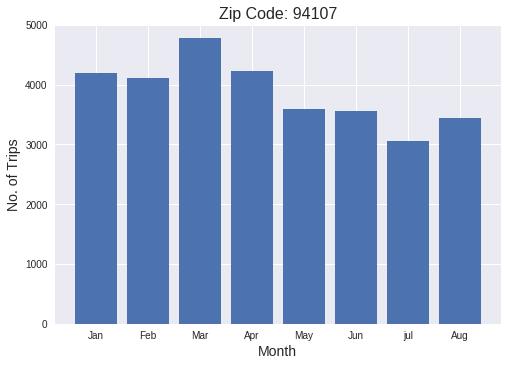

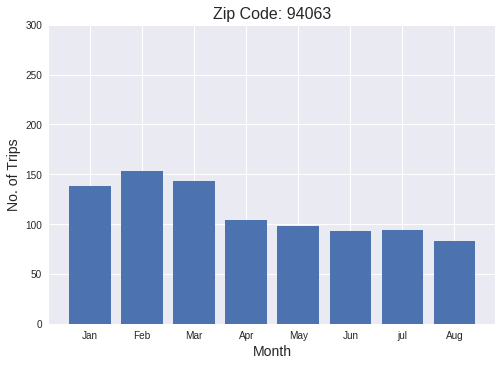

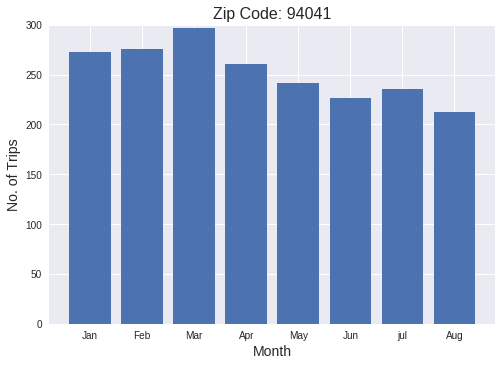

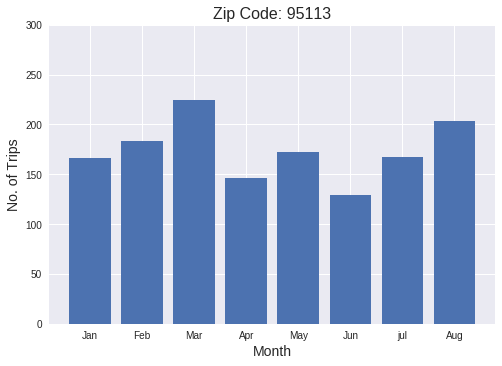

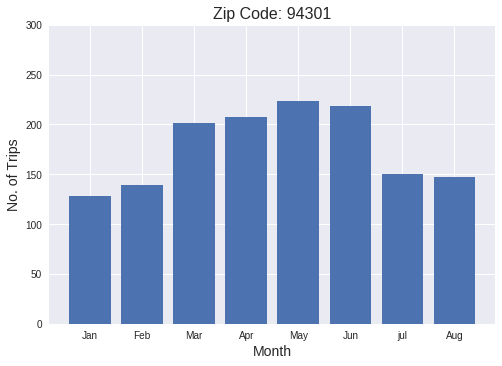

In [56]:
for i in range(len(areaCounts)):
  plt.bar(areaCounts[i]['index'], areaCounts[i]['month']);
  plt.title(('Zip Code: ' + str(areas[i])), fontdict={'fontsize': 16})
  plt.xlabel("Month", fontdict={'fontsize': 14});
  plt.ylabel("No. of Trips", fontdict={'fontsize': 14});
  if(i < 1):
    plt.ylim(0, 5000);
  else:
    plt.ylim(0, 300);
  plt.show()

In [50]:
weather['zip_code'].value_counts().reset_index()['index']

0    95113
1    94301
2    94107
3    94063
4    94041
Name: index, dtype: int64

In [41]:
stations['city'].value_counts()

San Francisco    35
San Jose         16
Redwood City      7
Mountain View     7
Palo Alto         5
Name: city, dtype: int64

In [40]:
trips2015['city'].value_counts()

San Francisco    215061
San Jose          12059
Mountain View      7000
Palo Alto          2159
Redwood City       1635
Name: city, dtype: int64

In [57]:
checkTrips = [];
for area in areas:
  checkTrip = trips2015[trips2015['zip_code'] == str(area)]
  checkTrip['zip_code'] = checkTrip['zip_code'].apply(lambda x: int(x))
  checkTrips.append(checkTrip);
checkTrips[0].head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,id,duration,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_id,subscription_type,zip_code,start_time,end_time,day,month,year,city
4,598976,351,1/10/2015,Commercial at Montgomery,45,1/10/2015,Grant Avenue at Columbus Avenue,73,534,Subscriber,94107,17:46,17:52,10,1,2015,San Francisco
9,601001,216,1/12/2015,Commercial at Montgomery,45,1/12/2015,Broadway St at Battery St,82,361,Subscriber,94107,18:26,18:29,12,1,2015,San Francisco
12,601172,309,1/12/2015,Commercial at Montgomery,45,1/12/2015,Grant Avenue at Columbus Avenue,73,493,Subscriber,94107,21:12,21:17,12,1,2015,San Francisco
20,600465,238,1/12/2015,Commercial at Montgomery,45,1/12/2015,Broadway St at Battery St,82,496,Subscriber,94107,15:25,15:29,12,1,2015,San Francisco
23,600760,236,1/12/2015,Commercial at Montgomery,45,1/12/2015,Broadway St at Battery St,82,292,Subscriber,94107,17:17,17:21,12,1,2015,San Francisco


In [58]:
tripCounts = [];
for i in range(len(checkTrips)):
  tripCount = checkTrips[i]['day'].value_counts().reset_index().sort_values('index');
  tripCount.columns = ['day', 'trips'];
  tripCounts.append(tripCount);
tripCounts[0].head()

,day,trips
29,1,849
13,2,1022
11,3,1025
22,4,948
17,5,1002


In [59]:
weathers = [];
for area in areas:
  weathers.append(weather2015[weather2015['zip_code'] == area]);
  
weathers[0].head()

,date,max_temperature_f,mean_temperature_f,min_temperature_f,max_dew_point_f,mean_dew_point_f,min_dew_point_f,max_humidity,mean_humidity,min_humidity,max_sea_level_pressure_inches,mean_sea_level_pressure_inches,min_sea_level_pressure_inches,max_visibility_miles,mean_visibility_miles,min_visibility_miles,max_wind_Speed_mph,mean_wind_speed_mph,max_gust_speed_mph,precipitation_inches,cloud_cover,events,wind_dir_degrees,zip_code,day,month,year
1962,1/1/2015,56.0,47.0,38.0,27.0,20.0,14.0,54.0,37.0,20.0,30.18,30.13,30.07,10.0,10.0,10.0,23.0,8.0,28.0,0,1.0,NaN,40.0,94107,1,1,2015
1963,1/2/2015,50.0,41.0,32.0,36.0,30.0,25.0,76.0,64.0,52.0,30.23,30.18,30.13,10.0,10.0,9.0,8.0,4.0,10.0,0,1.0,NaN,63.0,94107,2,1,2015
1964,1/3/2015,53.0,43.0,32.0,38.0,34.0,28.0,82.0,66.0,50.0,30.33,30.26,30.20,10.0,10.0,8.0,12.0,2.0,14.0,0,1.0,NaN,305.0,94107,3,1,2015
1965,1/4/2015,54.0,45.0,35.0,42.0,37.0,33.0,85.0,72.0,59.0,30.44,30.38,30.32,10.0,8.0,6.0,14.0,3.0,17.0,0,5.0,NaN,154.0,94107,4,1,2015
1966,1/5/2015,56.0,46.0,36.0,43.0,38.0,32.0,85.0,68.0,50.0,30.39,30.32,30.23,10.0,9.0,6.0,8.0,3.0,9.0,0,4.0,NaN,170.0,94107,5,1,2015


In [60]:
checks = [];
for i in range(len(areas)):
  check = pd.merge(weathers[i], tripCounts[i], on="day");
  checks.append(check);
checks[0].head(10)

,date,max_temperature_f,mean_temperature_f,min_temperature_f,max_dew_point_f,mean_dew_point_f,min_dew_point_f,max_humidity,mean_humidity,min_humidity,max_sea_level_pressure_inches,mean_sea_level_pressure_inches,min_sea_level_pressure_inches,max_visibility_miles,mean_visibility_miles,min_visibility_miles,max_wind_Speed_mph,mean_wind_speed_mph,max_gust_speed_mph,precipitation_inches,cloud_cover,events,wind_dir_degrees,zip_code,day,month,year,trips
0,1/1/2015,56.0,47.0,38.0,27.0,20.0,14.0,54.0,37.0,20.0,30.18,30.13,30.07,10.0,10.0,10.0,23.0,8.0,28.0,0,1.0,NaN,40.0,94107,1,1,2015,849
1,2/1/2015,65.0,53.0,40.0,48.0,42.0,37.0,83.0,62.0,40.0,30.19,30.13,30.06,10.0,10.0,9.0,12.0,3.0,14.0,0,5.0,NaN,284.0,94107,1,2,2015,849
2,3/1/2015,63.0,54.0,44.0,47.0,41.0,33.0,92.0,64.0,36.0,30.00,29.95,29.91,10.0,10.0,10.0,17.0,7.0,21.0,0,1.0,NaN,294.0,94107,1,3,2015,849
3,4/1/2015,65.0,55.0,45.0,45.0,38.0,30.0,80.0,56.0,32.0,30.19,30.14,30.08,10.0,10.0,10.0,24.0,9.0,26.0,0,2.0,NaN,301.0,94107,1,4,2015,849
4,5/1/2015,76.0,65.0,53.0,54.0,51.0,48.0,93.0,71.0,49.0,29.92,29.86,29.80,10.0,10.0,9.0,20.0,9.0,23.0,0,2.0,NaN,312.0,94107,1,5,2015,849
5,6/1/2015,73.0,65.0,57.0,55.0,53.0,50.0,87.0,68.0,49.0,30.06,30.03,29.97,10.0,9.0,2.0,21.0,10.0,24.0,T,6.0,Rain,233.0,94107,1,6,2015,849
6,7/1/2015,76.0,67.0,58.0,57.0,56.0,54.0,87.0,69.0,50.0,29.93,29.88,29.82,10.0,10.0,10.0,24.0,9.0,30.0,0,5.0,NaN,309.0,94107,1,7,2015,849
7,8/1/2015,75.0,69.0,62.0,60.0,57.0,55.0,78.0,68.0,57.0,30.03,29.98,29.94,10.0,10.0,10.0,20.0,12.0,24.0,0,5.0,NaN,276.0,94107,1,8,2015,849
8,1/2/2015,50.0,41.0,32.0,36.0,30.0,25.0,76.0,64.0,52.0,30.23,30.18,30.13,10.0,10.0,9.0,8.0,4.0,10.0,0,1.0,NaN,63.0,94107,2,1,2015,1022
9,2/2/2015,65.0,54.0,43.0,51.0,47.0,41.0,100.0,83.0,65.0,30.20,30.14,30.09,10.0,8.0,6.0,9.0,3.0,12.0,0,4.0,NaN,268.0,94107,2,2,2015,1022
